# Sprawozdanie wykonane przez:
# Maksyma Plakushko

### Wprowadzenie potrzebnych bibliotek

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from keras_tuner.tuners import RandomSearch
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from joblib import dump
import joblib
from joblib import load
from joblib import dump

def prepare_data(df):
    df['age_category'] = df['housing_median_age'].map(age_category)
    df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4})
    df = df.fillna(df.mean())
    return df
def age_category(age):
    if age < 10:
        return 0
    elif age < 20:
        return 1
    elif age < 30:
        return 2
    elif age < 40:
        return 3
    elif age < 50:
        return 4
    else:
        return 5
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
# Випадкове встановлення NaN
np.random.seed(42)
nan_indices = np.random.choice(df.index, size=int(len(df) * 0.1), replace=False)


### Zadanie 1. Wizualizacja danych
### Wizualizacja danych
### Mean Body Mass of Penguins

In [2]:
from symbol import comparison

import seaborn as sns
import pandas as pd
from setuptools.package_index import unique_values
from statsmodels.graphics.tukeyplot import results

df = sns.load_dataset('penguins')
mean = df.groupby('species')['body_mass_g'].mean()
print(mean)

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


In [3]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 1D Histogram of Mean Body Mass

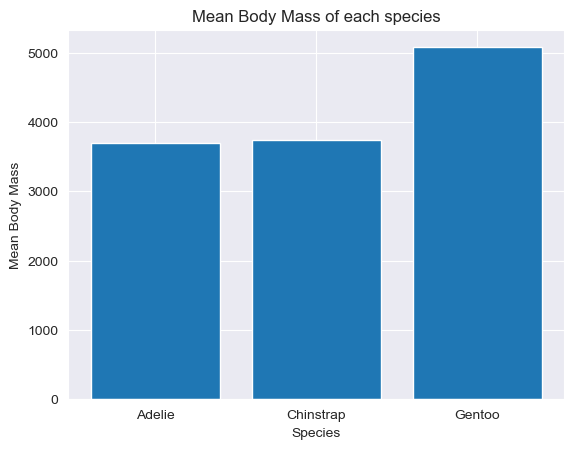

In [4]:
import matplotlib.pyplot as plt
x = mean.index
y = mean.values

plt.title('Mean Body Mass of each species')
plt.xlabel('Species')
plt.ylabel('Mean Body Mass')
plt.bar(x,y)
plt.show()

###

### 2D Scatter Plot of depth vs length of a bill

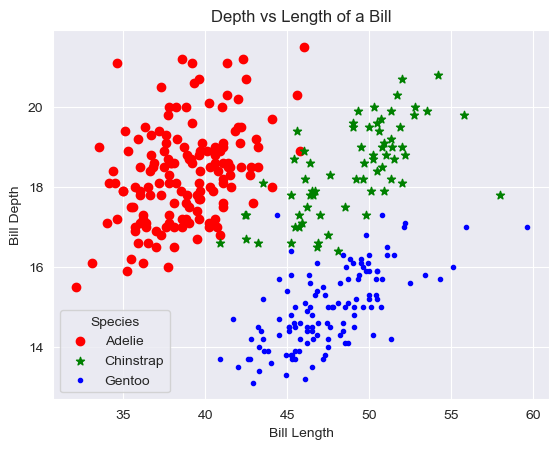

In [5]:
x = df['bill_length_mm']
y = df['bill_depth_mm']
plt.title('Depth vs Length of a Bill')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
colors = {'Adelie':'red', 'Chinstrap':'green', 'Gentoo':'blue'}
markers = {'Adelie':'o', 'Chinstrap':'*', 'Gentoo':'.'}
for s in df['species'].unique():
    subset = df[df['species'] == s]
    x = subset['bill_length_mm']
    y = subset['bill_depth_mm']
    plt.scatter(x,y,c=colors[s], marker=markers[s], label = s)
plt.legend(title='Species')
plt.show()

### 3D Scatter Plot of body mass vs bill length vs bill depth

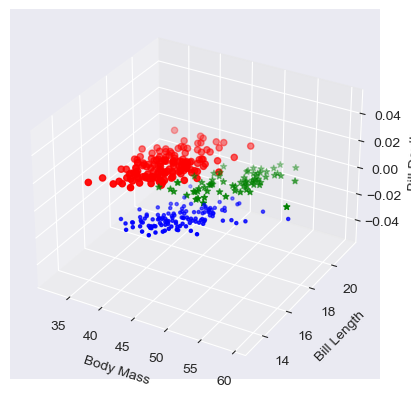

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df['body_mass_g']
y = df['bill_length_mm']
z = df['bill_depth_mm']
colors = {'Adelie':'red', 'Chinstrap':'green', 'Gentoo':'blue'}
markers = {'Adelie':'o', 'Chinstrap':'*', 'Gentoo':'.'}
for s in df['species'].unique():
    subset = df[df['species'] == s]
    x = subset['bill_length_mm']
    y = subset['bill_depth_mm']
    ax.scatter(x,y,c=colors[s], marker=markers[s], label = s)
ax.set_xlabel('Body Mass')
ax.set_ylabel('Bill Length')
ax.set_zlabel('Bill Depth')
plt.show()

### Histogram of length of a flipper

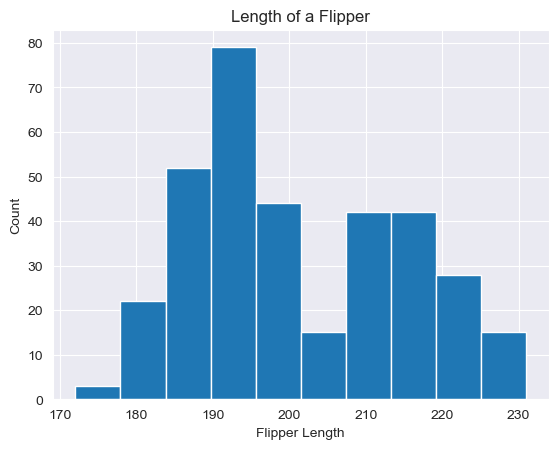

In [7]:
x = df['flipper_length_mm']
plt.title('Length of a Flipper')
plt.xlabel('Flipper Length')
plt.ylabel('Count')
plt.hist(x)
plt.show()

### Heatmap of length of islands and species

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe       44.0        NaN   124.0
Dream        56.0       68.0     NaN
Torgersen    52.0        NaN     NaN


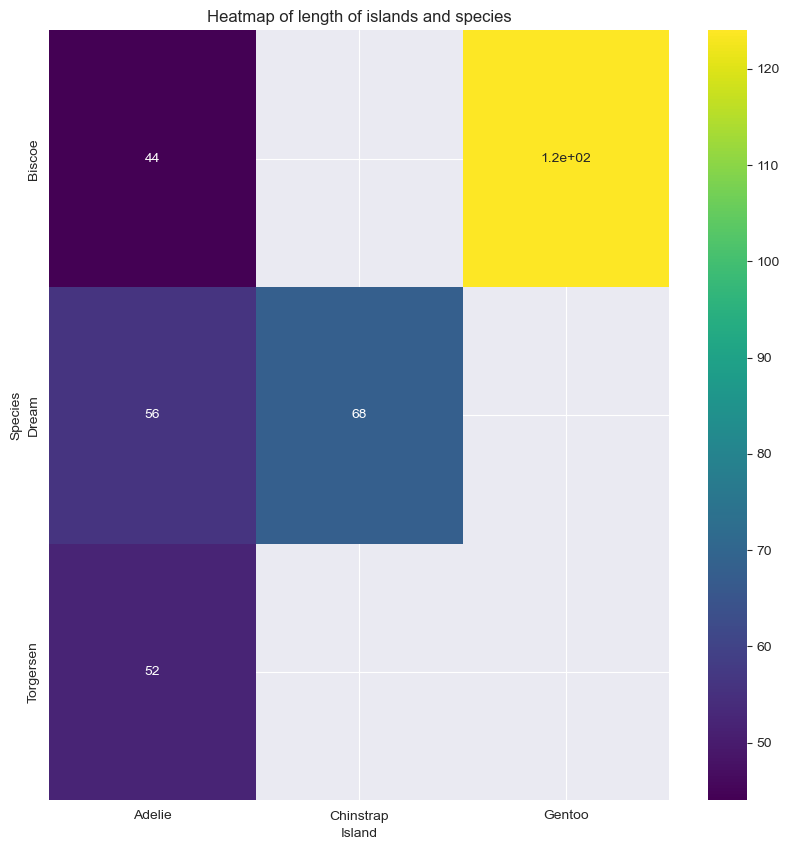

In [8]:
x = df['island']
y = df['species']
observations = df.groupby(['island', 'species']).size()
multi_index = pd.MultiIndex.from_tuples(observations.keys(), names=['island', 'species'])
series = pd.Series(observations, index=multi_index)
heatmap_data = series.unstack(level='species')

print(heatmap_data)

plt.figure(figsize=(10,10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of length of islands and species')
plt.xlabel('Island')
plt.ylabel('Species')
plt.show()

### Boxplot of body mass and sex

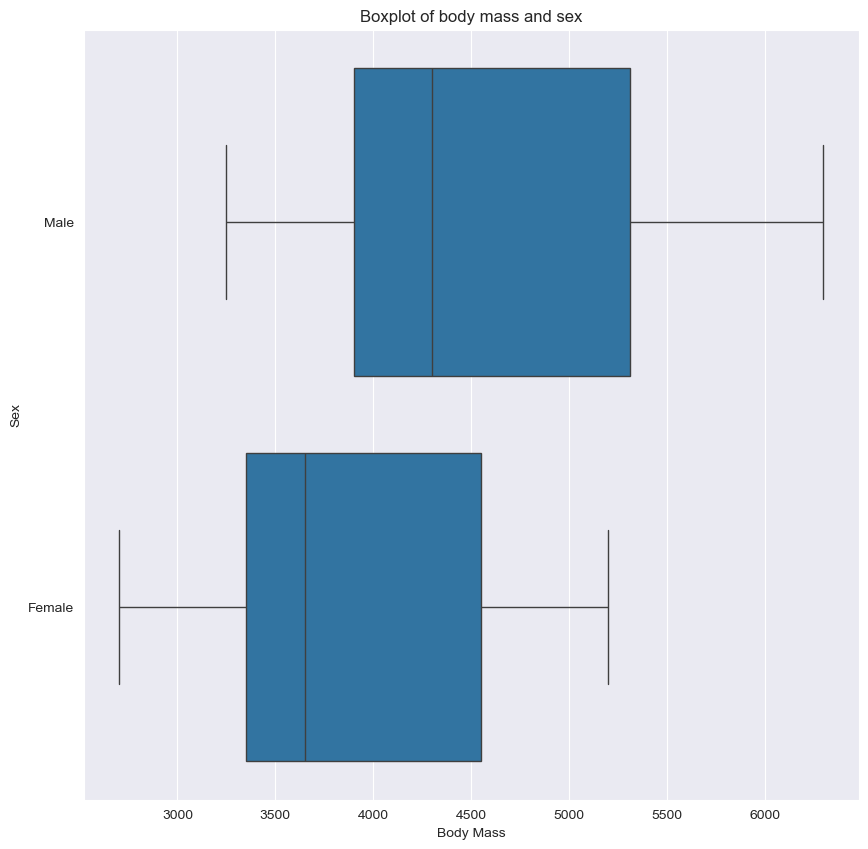

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='body_mass_g', y='sex', data=df)
plt.title('Boxplot of body mass and sex')
plt.xlabel('Body Mass')
plt.ylabel('Sex')
plt.show()

### Boxplot of body mass and island

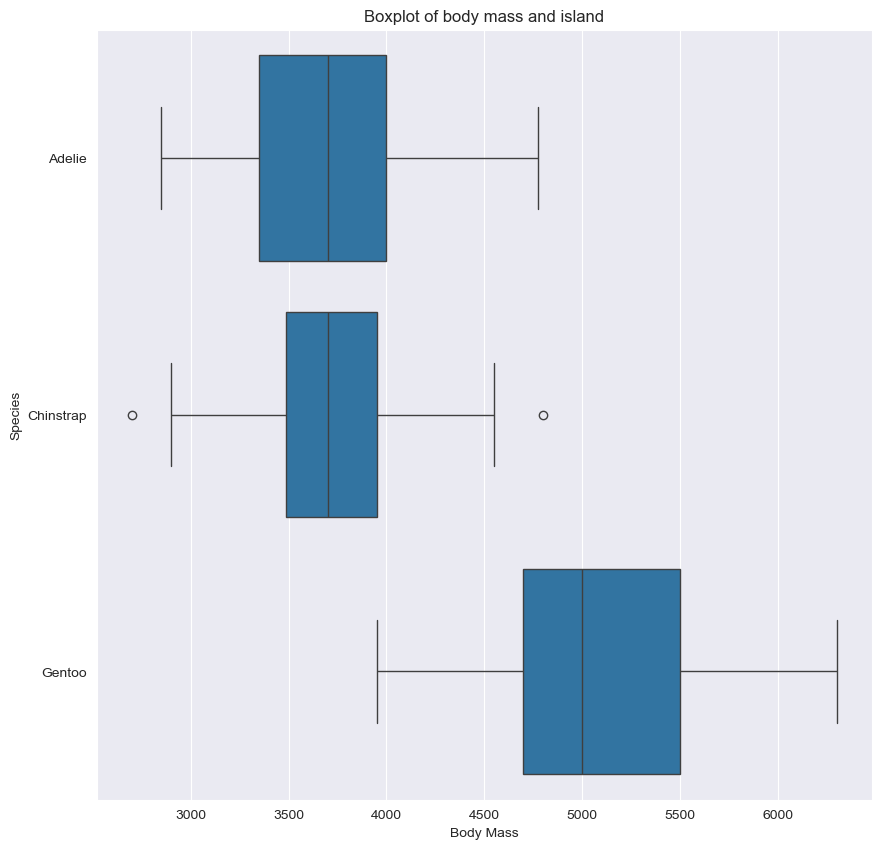

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(x='body_mass_g', y='species', data=df)
plt.title('Boxplot of body mass and island')
plt.xlabel('Body Mass')
plt.ylabel('Species')
plt.show()

### Surface plot of length of a bill, depth of a bill and body mass

In [1]:
import numpy as np
from scipy.interpolate import griddata
df_clean = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'body_mass_g'])
x = df_clean['bill_length_mm']
y = df_clean['bill_depth_mm']
z = df_clean['body_mass_g']

x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z_grid = griddata((x, y), z, (x_grid, y_grid), method='linear')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid,y_grid,z_grid, cmap='viridis', edgecolor='none')

ax.set_title("Surface plot of length of a bill, depth of a bill and body mass")
ax.set_xlabel('Bill Length')
ax.set_ylabel('Bill Depth')
ax.set_zlabel('Body Mass')
plt.show()

NameError: name 'df' is not defined

Zadanie 2: Czyszczenie, konsolidacja, transformacja i mapowanie  danych
Cel: Zadanie będzie dotyczyć analizy zestawu danych o nieruchomościach, zawierającego informacje o cenach domów, powierzchni, liczbie pokoi itp. Dane można pobrać z Kaggle - House Prices Dataset

### Read data

In [12]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df_original = df.copy()

### Indenfication of missing values and drop them

In [13]:
print("Number of duplicates before dropping:",df.duplicated().sum(),"\nNumber of rows:",len(df))
df.drop_duplicates(keep='first', inplace=True)
print("Number of duplicates after dropping:",df.duplicated().sum(),"\nNumber of rows:",len(df))

Number of duplicates before dropping: 0 
Number of rows: 20640
Number of duplicates after dropping: 0 
Number of rows: 20640


### Adding duplicate rows and elimination of duplicates

In [14]:
df = pd.concat([df,df.iloc[0:10]], ignore_index=True)
print("Number of duplicates after adding duplicate rows:",df.duplicated().sum(),"\nNumber of rows:",len(df))

df = df.drop_duplicates(keep='first', inplace=False)
print("Number of duplicates after dropping duplicate rows:",df.duplicated().sum(),"\nNumber of rows:",len(df))


Number of duplicates after adding duplicate rows: 10 
Number of rows: 20650
Number of duplicates after dropping duplicate rows: 0 
Number of rows: 20640


### Cleaning empty rows

In [16]:
print("After cleaning:\n",df.isna().sum())
df.dropna(how='any', inplace=True)
print("\nAfter cleaning:\n",df.isna().sum())

After cleaning:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

After cleaning:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Inputing missing values by mean

In [25]:
df = pd.read_csv(url)
print('Number of missing values before imputing:',df['total_bedrooms'].isna().sum())
mean_value = int(df['total_bedrooms'].mean())
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_value)
print('Number of missing values after imputing:',df['total_bedrooms'].isna().sum())
df.head()


Number of missing values before imputing: 207
Number of missing values after imputing: 0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Inputing missing values by median

In [26]:
min_value = df['median_income'].min()
max_value = df['median_income'].max()
df['median_income'] = (df['median_income'] - min_value) / (max_value - min_value)
df['median_income'].head(100)

0     0.539668
1     0.538027
2     0.466028
3     0.354699
4     0.230776
        ...   
95    0.104116
96    0.161005
97    0.103881
98    0.049558
99    0.145550
Name: median_income, Length: 100, dtype: float64

### Mapping of a data

In [27]:
unique_values = df['ocean_proximity'].unique().tolist()
print(unique_values)

df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4})
df['ocean_proximity'].head(10000)


['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']


0       0
1       0
2       0
3       0
4       0
       ..
9995    2
9996    2
9997    2
9998    2
9999    2
Name: ocean_proximity, Length: 10000, dtype: int64

### Transformation of median_house_value to logarithm

In [17]:
df['median_house_value'] = np.log(df['median_house_value'])
df['median_house_value'].head(100)

0     13.022764
1     12.789684
2     12.771671
3     12.740517
4     12.743151
        ...    
95    11.775290
96    12.121603
97    11.736069
98    12.043554
99    12.170963
Name: median_house_value, Length: 100, dtype: float64

### Mapping of a data to a categories

In [18]:
df['age_category'] = df['housing_median_age'].map(age_category)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022764,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789684,NEAR BAY,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771671,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740517,NEAR BAY,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743151,NEAR BAY,5
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,12.505066,NEAR BAY,5
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,12.608868,NEAR BAY,5
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,12.394211,NEAR BAY,5
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,12.331383,NEAR BAY,4
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,12.472659,NEAR BAY,5


### Analizing of new columns

Number of unique values in age_category: 6

Summary table:
    Age category  Number
0             3    5723
1             2    4795
2             1    4481
3             4    2694
4             5    1447
5             0    1293

Description statistics for median_house_value:
 count    20433.000000
mean        12.084862
std          0.569222
min          9.615739
25%         11.691072
50%         12.099044
75%         12.486352
max         13.122365
Name: median_house_value, dtype: float64


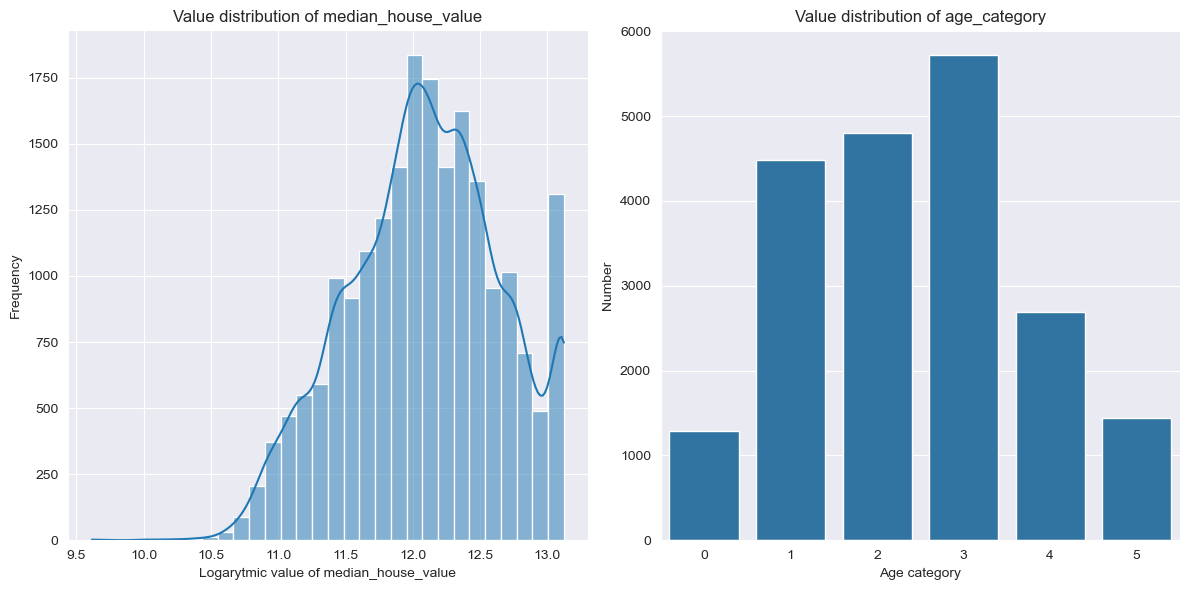

In [19]:
unique_age_categories = df['age_category'].nunique()
unique_age_categories_count = df['age_category'].value_counts()
print("Number of unique values in age_category:", unique_age_categories)
summary_table = pd.DataFrame({
    'Age category': unique_age_categories_count.index,
    'Number': unique_age_categories_count.values
})
print("\nSummary table:\n", summary_table)

log_value_description = df['median_house_value'].describe()
print("\nDescription statistics for median_house_value:\n", log_value_description)

# Wykres rozkładu wartości w median_house_value
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Value distribution of median_house_value')
plt.xlabel('Logarytmic value of median_house_value')
plt.ylabel('Frequency')

# Wykres słupkowy dla age_category
plt.subplot(1, 2, 2)
sns.barplot(x=summary_table['Age category'], y=summary_table['Number'])
plt.title('Value distribution of age_category')
plt.xlabel('Age category')
plt.ylabel('Number')

plt.tight_layout()
plt.show()

### Zadanie 3: Imputacja brakujących wartości metodami sztucznej inteligencji
### Cel: Zadanie będzie dotyczyć analizy zestawu danych o nieruchomościach, zawierającego informacje o cenach domów, powierzchni, liczbie pokoi itp.
### A)	Zaproponuj 3 różne metody uzupełnienia brakujących danych w oryginalnym zestawie House Prices Dataset, np. za pomcą metody KNN, lasu losowego czy regresji.
### B)	Zaimplementuj uzupełnianie brakujących danych każdej z metod, a wyniki zaprezentuj w sposób tabelaryczny i graficzny, tak aby było dokładnie widać jakimi wartościami poszczególne algorytmy zastąpiły wartości brakujące.

### Inputing missing values by KNN

In [63]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
original_df = df.copy()

# Add missing values
df.loc[nan_indices, 'median_house_value'] = np.nan

# Prepare features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the KNN model pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(weights='distance'))
])

# Define parameter grid for KNN
param_grid = {
    'model__n_neighbors': [3, 5, 7, 10, 15],
    'model__p': [1, 2],  # 1: Manhattan, 2: Euclidean
    'model__weights': ['uniform', 'distance'],
    'preprocessor__num__imputer__n_neighbors': [3, 5, 7]
}

# Split data - use only non-missing target values for training
train_mask = ~y.isna()
X_train = X[train_mask]
y_train = y[train_mask]

# Perform grid search
print("Performing grid search for best KNN parameters...")
grid_search = GridSearchCV(
    knn_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV score (negative MAE): {grid_search.best_score_:.2f}")

# Make predictions for missing values
X_missing = X[~train_mask]
if not X_missing.empty:
    print("\nPredicting missing values...")
    imputed_values = best_knn.predict(X_missing)

    # Create comparison with original values
    comparison = pd.DataFrame({
        'Original': original_df.loc[X_missing.index, 'median_house_value'],
        'Imputed': imputed_values
    })

    # Calculate differences
    comparison['Difference'] = comparison['Imputed'] - comparison['Original']
    comparison['Abs_Difference'] = comparison['Difference'].abs()

    # Print results
    print("\nPrediction results summary:")
    print(f"Mean Absolute Error: {comparison['Abs_Difference'].mean():.2f}")
    print(f"Max Absolute Error: {comparison['Abs_Difference'].max():.2f}")
    print(f"Min Absolute Error: {comparison['Abs_Difference'].min():.2f}")


    # ... (previous code remains the same until the results section)

# Make predictions for missing values
X_missing = X[~train_mask]
if not X_missing.empty:
    print("\nPredicting missing values...")
    imputed_values = best_knn.predict(X_missing)

    # Create comparison with original values
    comparison = pd.DataFrame({
        'Original': original_df.loc[X_missing.index, 'median_house_value'],
        'Predicted': imputed_values
    })

    # Calculate accuracy metrics
    comparison['Error'] = comparison['Predicted'] - comparison['Original']
    comparison['Abs_Error'] = np.abs(comparison['Error'])
    comparison['Pct_Error'] = (comparison['Abs_Error'] / comparison['Original']) * 100

    # Calculate key metrics
    metrics = {
        'Model': 'KNN',
        'MAE': comparison['Abs_Error'].mean(),
        'RMSE': np.sqrt((comparison['Error']**2).mean()),
        'Median_Abs_Error': comparison['Abs_Error'].median(),
        'R2_Score': r2_score(comparison['Original'], comparison['Predicted']),
        'Within_10%': (comparison['Pct_Error'] <= 10).mean() * 100,
        'Within_20%': ((comparison['Pct_Error'] > 10) & (comparison['Pct_Error'] <= 20)).mean() * 100,
        'Within_30%': ((comparison['Pct_Error'] > 20) & (comparison['Pct_Error'] <= 30)).mean() * 100,
        'Over_30%': (comparison['Pct_Error'] > 30).mean() * 100
    }

    # Print metrics in a clean table
    metrics_df = pd.DataFrame([metrics])
    print("\nModel Accuracy Metrics:")
    print(metrics_df.to_string(index=False, float_format='{:.2f}'.format))

    # Save metrics for comparison
    metrics_df.to_csv('knn_metrics.csv', index=False)
    print("\nMetrics saved to 'knn_metrics.csv'")

    # Save predictions
    comparison.to_csv('knn_predictions.csv', index=False)
    print("Detailed predictions saved to 'knn_predictions.csv'")

    # Update the original dataframe with imputed values
    df_imputed = df.copy()
    df_imputed.loc[X_missing.index, 'median_house_value'] = imputed_values
    df_imputed.to_csv('knn_imputed_values.csv')
    print("Dataset with imputed values saved to 'knn_imputed_values.csv'")


Performing grid search for best KNN parameters...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best parameters: {'model__n_neighbors': 10, 'model__p': 2, 'model__weights': 'distance', 'preprocessor__num__imputer__n_neighbors': 3}
Best CV score (negative MAE): -53340.80

Predicting missing values...

Prediction results summary:
Mean Absolute Error: 40164.75
Max Absolute Error: 399514.53
Min Absolute Error: 0.00

Predicting missing values...

Model Accuracy Metrics:
Model      MAE     RMSE  Median_Abs_Error  R2_Score  Within_10%  Within_20%  Within_30%  Over_30%
  KNN 40164.75 61054.96          25082.11      0.72       35.61       24.32       16.86     23.21

Metrics saved to 'knn_metrics.csv'
Detailed predictions saved to 'knn_predictions.csv'
Dataset with imputed values saved to 'knn_imputed_values.csv'


### Inputing missing values by Random Forest

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Завантаження даних
df_rf = pd.read_csv(url)
df_rf = prepare_data(df_rf)
df_copy = df_rf.copy()

# Випадкове встановлення NaN
df_rf.loc[nan_indices, 'median_house_value'] = np.nan

correlation = df_copy.corr()['median_house_value'].abs().sort_values(ascending=False)

# Беремо топ-10 корельованих ознак
top_features = correlation[1:11].index.tolist()

# Створення X та y
X = df_copy[top_features]
y = df_copy['median_house_value']  # Не видаляємо NaN

model = RandomForestRegressor()
selector = SelectFromModel(estimator=model, max_features=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features: {selected_features}")
X = df_rf[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Видаляємо цільову змінну з X_train та X_test
X_train = X_train.drop('median_house_value', axis=1, errors='ignore')
X_test = X_test.drop('median_house_value', axis=1, errors='ignore')


# Параметри для Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Крос-валідація
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Створення моделі
rf_model = RandomForestRegressor()
scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')
print(f"Cross-validation R^2 values: {scores.mean():.3f} ± {scores.std():.3f}")

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Навчайте модель на даних без NaN

Вибрані ознаки: ['median_income', 'ocean_proximity', 'longitude']
Значення R^2 за крос-валідацією: 0.679 ± 0.015


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

### Iterative imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df_ii = pd.read_csv(url)
df_ii = prepare_data(df_ii)
df_copy = df_ii.copy()
df_copy.loc[nan_indices, 'median_house_value'] = np.nan


imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42) # Creating the imputer
df_ii_filled = imputer.fit_transform(df_copy) # Fitting and imputing
df_ii_filled = pd.DataFrame(df_ii_filled, columns=df_copy.columns)
df_ii_filled.loc[nan_indices, 'median_house_value'].head(100)

### Comparison

In [72]:
# Завантаження даних
random_forest_imputed = pd.read_csv('random_forest_imputed_values.csv', index_col=0)
iterative_imputed = pd.read_csv('iterative_imputer_values.csv', index_col=0)
knn_imputed = pd.read_csv('knn_imputed_values.csv', index_col=0)

# Отримуємо фактичні значення
actual_values = df_original.loc[nan_indices, 'median_house_value'].astype(float)

# Отримуємо прогнозовані значення
predicted_rf = random_forest_imputed.loc[nan_indices, 'median_house_value'].astype(float)
predicted_ii = iterative_imputed.loc[nan_indices, 'median_house_value'].astype(float)
predicted_knn = knn_imputed.loc[nan_indices, 'median_house_value'].astype(float)

# Функція для розрахунку метрик
def calculate_metrics(y_true, y_pred, method_name):
    # Видаляємо NaN значення перед обчисленням метрик
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return pd.DataFrame({
        'Method': [method_name],
        'MAE': [mae],
        'RMSE': [rmse],
        'R2': [r2]
    })

# Обчислюємо метрики для кожного методу
metrics_rf = calculate_metrics(actual_values, predicted_rf, 'Random Forest')
metrics_ii = calculate_metrics(actual_values, predicted_ii, 'Iterative Imputer')
metrics_knn = calculate_metrics(actual_values, predicted_knn, 'KNN')

# Об'єднуємо всі метрики
all_metrics = pd.concat([metrics_rf, metrics_ii, metrics_knn], ignore_index=True)

# Виводимо результати
print("Comparison of Imputation Methods:")
print(all_metrics)

# Створюємо таблицю порівняння
comparison_df = pd.DataFrame({
    'Actual': actual_values,
    'Random Forest': predicted_rf,
    'Iterative Imputer': predicted_ii,
    'KNN': predicted_knn
})

Comparison of Imputation Methods:
              Method           MAE          RMSE        R2
0      Random Forest  38259.426304  57040.842759  0.756026
1  Iterative Imputer  32435.894385  50738.526821  0.806960
2                KNN  40164.747669  61054.961817  0.720480
